<a href="https://colab.research.google.com/github/mccajl/Risk_Ensembles/blob/master/explaining_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/2021/'PSU REU 2021'/Explaining_Training

/content/gdrive/MyDrive/2021/PSU REU 2021/Explaining_Training


In [ ]:
import os
!pip install -r requirements.txt
!pip install -e DQN
!pip install -e .

Obtaining file:///content/gdrive/MyDrive/2021/PSU%20REU%202021/Explaining_Training/DQN
  Running setup.py develop for DQN
Obtaining file:///content/gdrive/MyDrive/2021/PSU%20REU%202021/Explaining_Training
  Running setup.py develop for explain-training


In [ ]:
!python Tests/test_risk_estimation.py --env "Cartpole" \
    --avf_path "weights/CartpoleRisk2" \
    --agent_path "weights/CartpoleRisk2/q_net_2001.pt" \
    --agent_info 2001

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Mean reward: 336.2
AVF Accuracy:  0.7999036365778989
Prediction average:  0.27416706


In [ ]:
!python Tests/test_frozen_ensemble.py --env "Cartpole"
#Results from separate AVFs trained during separate policy training.

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward 136.7
Agent 2: Reward 65.4
Agent 3: Reward 89.9
Agent 4: Reward 96.7
Ensemble Agent: Reward 88.93
Agent Action Frequencies: [0.         0.         0.87473294 0.12526706]
Agent Average Risk: [0.33798914 0.43288989 0.1629541  0.4537941 ]


In [ ]:
!python train_separate_AVF.py --env "Cartpole"

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Average Reward: 93.24
Epoch 0
Approximator Loss: 0.5729714035987854 Accuracy: 0.201171875
Validation Acc: 0.22093522093522094
Epoch 1
Approximator Loss: 0.5608271956443787 Accuracy: 0.2109375
Validation Acc: 0.2517628402441787
Epoch 2
Approximator Loss: 0.550324022769928 Accuracy: 0.4970703125
Validation Acc: 0.545134029046513
Epoch 3
Approximator Loss: 0.541337788105011 Accuracy: 0.8896484375
Validation Acc: 0.6819128836503354
Epoch 4
Approximator Loss: 0.5328410863876343 Accuracy: 0.8779296875
Validation Acc: 0.7492547704902918
Epoch 5
Approximator Loss: 0.5258362889289856 Accuracy: 0.787109375
Validation Acc: 0.7595206670174495
Epoch 6
Approximator Loss: 0.5174986124038696 Accuracy: 0.8115234375
Validation Acc: 0.7645488612348329
Epoch 7
Approximator Loss: 0.5101507902145386 Accuracy: 0.765625
Validation Acc: 0.7760718063163365
Epoch 8
Approximator Loss: 0.4996742010116577 Accuracy: 0.794921875
Validat

In [ ]:
!python Tests/test_frozen_ensemble.py --env "Cartpole"
#Results from highly overfit AVFs trained with frozen policy data

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward 133.1
Agent 2: Reward 41.4
Agent 3: Reward 89.7
Agent 4: Reward 98.3
Ensemble Agent: Reward 332.92
Agent Action Frequencies: [0.71440586 0.         0.28559414 0.        ]
Agent Average Risk: [2.02363716e-29 5.37697794e-01 2.52057250e-02 2.99348099e-01]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "Cartpole"
#Test with underfit avfs. Great results

Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward 135.8
Agent 2: Reward 34.8
Agent 3: Reward 88.8
Agent 4: Reward 98.2
Ensemble Agent: Reward 1282.7
Agent Action Frequencies: [0.71390037 0.         0.28020582 0.00589382]
Agent Average Risk: [0.32883354 0.48579682 0.35006329 0.36443343]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "Cartpole"
#Test with underfit avfs trained with entropy regularizer

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward 135.8
Agent 2: Reward 64.7
Agent 3: Reward 89.0
Agent 4: Reward 99.4
Ensemble Agent: Reward 178.74
Agent Action Frequencies: [5.27302227e-01 1.11894372e-04 3.78426765e-01 9.41591138e-02]
Agent Average Risk: [0.21677028 0.34150881 0.2445652  0.24207864]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "Cartpole"
#Test with majority vote baseline policy

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward 134.7
Agent 2: Reward 47.8
Agent 3: Reward 88.7
Agent 4: Reward 89.3
Ensemble Agent: Reward 132.6
Agent Action Frequencies: [0.77564103 0.22435897 0.         0.        ]
Agent Average Risk: [0.24659497 0.24643374 0.12590215 0.39532549]


In [ ]:
!python main.py \
    --env "MountainCar" --learning_rate 0.001 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 1000000 --batch_size 32 --gamma 0.99 --log_every 1000 \
    --save_dir "weights/MCEnsemble" --save_every 25000 --risk_estimation True \
    --tune_F_iters 32 --H 50

Using libsumo as traci as requested by environment variable.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
Train the risk estimator
Timestep 1000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 2000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 3000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 4000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 5000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 6000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 7000, Last Reward: -500.0, Last 20 Avg Reward: -500.0, Last 20 Max: -500.0
Timestep 8000, Last 

In [ ]:
!python train_separate_AVF.py --env "MountainCar" --H 50

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Average Reward: -387.5
Epoch 0
Approximator Loss: 0.6420119404792786 Accuracy: 0.96875
Validation Acc: 0.9627096774193549
Epoch 1
Approximator Loss: 0.6221410036087036 Accuracy: 0.962890625
Validation Acc: 0.9627096774193549
Epoch 2
Approximator Loss: 0.6035829186439514 Accuracy: 0.9599609375
Validation Acc: 0.9627096774193549
Epoch 3
Approximator Loss: 0.5876705050468445 Accuracy: 0.953125
Validation Acc: 0.9627096774193549
Epoch 4
Approximator Loss: 0.5716007947921753 Accuracy: 0.9501953125
Validation Acc: 0.9627096774193549
Epoch 5
Approximator Loss: 0.5517327189445496 Accuracy: 0.9609375
Validation Acc: 0.9627096774193549
Epoch 6
Approximator Loss: 0.5323681235313416 Accuracy: 0.96875
Validation Acc: 0.9627096774193549
Epoch 7
Approximator Loss: 0.5218051075935364 Accuracy: 0.9541015625
Validation Acc: 0.9627096774193549
Epoch 8
Approximator Loss: 0.5074644684791565 Accuracy: 0.953125
Validation Acc: 

In [ ]:
!python Tests/test_frozen_ensemble.py --env "MountainCar"
#Results from highly overfit AVFs trained with frozen policy data

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward -138.7
Agent 2: Reward -458.5
Agent 3: Reward -142.3
Agent 4: Reward -458.8
Ensemble Agent: Reward -140.98
Agent Action Frequencies: [0.20967513 0.         0.79032487 0.        ]
Agent Average Risk: [0.28873619 0.96602385 0.27800203 0.91112201]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "MountainCar"
#Results from Majority Vote baseline

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward -143.9
Agent 2: Reward -500.0
Agent 3: Reward -142.8
Agent 4: Reward -428.3
Ensemble Agent: Reward -139.18
Agent Action Frequencies: [0.36571346 0.08880586 0.54548067 0.        ]
Agent Average Risk: [0.2780452  0.96344051 0.26437426 0.90437324]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "MountainCar"
#Results from underfit AVFs trained with frozen policy data

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward -140.3
Agent 2: Reward -500.0
Agent 3: Reward -152.3
Agent 4: Reward -380.1
Ensemble Agent: Reward -137.32
Agent Action Frequencies: [0.7400233 0.        0.2599767 0.       ]
Agent Average Risk: [0.29642442 0.84860913 0.3264615  0.78123871]


In [ ]:
!python Tests/test_frozen_ensemble.py --env "MountainCar"
#Results from underfit AVFs trained with frozen policy data, H=50

Using libsumo as traci as requested by environment variable.
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent Weights Loaded
Agent 1: Reward -135.3
Agent 2: Reward -500.0
Agent 3: Reward -133.5
Agent 4: Reward -381.9
Ensemble Agent: Reward -137.28
Agent Action Frequencies: [1. 0. 0. 0.]
Agent Average Risk: [0.61470725 0.79292687 0.62793955 0.78690841]


In [ ]:
!python main.py \
    --env "Cartpole" --learning_rate 0.01 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 500000 --batch_size 32 --gamma 0.99 --log_every 2000 \
    --save_dir "weights/CartEnsembleRand10" --save_every 2000 --risk_estimation True \
    --tune_F_iters 32 --H 20 --ensemble_n 10

NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
Train the risk estimator
Timestep 2000, Last Reward: 13.0, Last 20 Avg Reward: 23.8, Last 20 Max: 50.0
Timestep 4000, Last Reward: 12.0, Last 20 Avg Reward: 18.95, Last 20 Max: 41.0
Timestep 6000, Last Reward: 14.0, Last 20 Avg Reward: 18.9, Last 20 Max: 33.0
Timestep 8000, Last Reward: 16.0, Last 20 Avg Reward: 21.2, Last 20 Max: 43.0
Testing agents [278 372  91  91 372 186 186  91 186 186]
Agent 1: Reward 9.4
Agent 2: Reward 9.2
Agent 3: Reward 11.35
Agent 4: Reward 11.5
Agent 5: Reward 9.4
Agent 6: Reward 9.1
Agent 7: Reward 9.3
Agent 8: Reward 11.05
Agent 9: Reward 9.2
Agent 10: Reward 9.3
Ensemble Agent: Reward 9.32
Agent Action Frequencies: [0.56223176 0.09871245 0.32188841 0.         0.         0.01716738
 0.         0.         0.         0.        ]
Agent Average Risk: [0.81010

In [ ]:
!python main.py \
    --env "Cartpole" --learning_rate 0.01 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 500000 --batch_size 32 --gamma 0.99 --log_every 2000 \
    --save_dir "weights/CartEnsembleValBest" --save_every 2000 --risk_estimation True \
    --tune_F_iters 32 --H 20

NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
NOT Using GPU: GPU not requested or not available.
Train the risk estimator
Timestep 2000, Last Reward: 11.0, Last 20 Avg Reward: 21.5, Last 20 Max: 49.0
Timestep 4000, Last Reward: 17.0, Last 20 Avg Reward: 19.5, Last 20 Max: 46.0
Timestep 6000, Last Reward: 36.0, Last 20 Avg Reward: 20.65, Last 20 Max: 43.0
Timestep 8000, Last Reward: 33.0, Last 20 Avg Reward: 20.3, Last 20 Max: 42.0
Testing agents [274, 183, 372, 89]
Agent 1: Reward 9.4
Agent 2: Reward 13.15
Agent 3: Reward 14.9
Agent 4: Reward 16.1
Ensemble Agent: Reward 9.42
Agent Action Frequencies: [0.6836518  0.03609342 0.28025478 0.        ]
Agent Average Risk: [0.80960388 0.8226768  0.83752918 0.88509458]
Timestep 10000, Last Reward: 36.0, Last 20 Avg Reward: 25.7, Last 20 Max: 52.0
Timestep 12000, Last Reward: 25.0, Last 20 Avg Reward: 23.35, Last 20 Max: 55.0
Timestep 14000

Figures:

Ensemble recent uses the most recent 4 agents in the ensemble

Ensemble random uses 4 random agents from previous training

Ensemble best uses the 4 best agents according to avg reward from 20 episodes of rollouts

In [ ]:
!python Tests/test_all_ensembles.py --env 'Cartpole'

Testing 495 ensembles
Ensemble with agents: [1111, 1710, 1813, 1877] and rewards: [10.0, 201.45, 145.85, 277.5]
Reward: 267.85
Ensemble with agents: [1111, 1710, 1813, 1931] and rewards: [10.0, 201.45, 145.85, 234.45]
Reward: 258.35
Ensemble with agents: [1111, 1710, 1813, 1993] and rewards: [10.0, 201.45, 145.85, 107.95]
Reward: 145.8
Ensemble with agents: [1111, 1710, 1813, 2129] and rewards: [10.0, 201.45, 145.85, 95.75]
Reward: 112.95
Ensemble with agents: [1111, 1710, 1813, 2227] and rewards: [10.0, 201.45, 145.85, 101.55]
Reward: 158.25
Ensemble with agents: [1111, 1710, 1813, 2343] and rewards: [10.0, 201.45, 145.85, 92.3]
Reward: 218.05
Ensemble with agents: [1111, 1710, 1813, 2453] and rewards: [10.0, 201.45, 145.85, 79.15]
Reward: 220.75
Ensemble with agents: [1111, 1710, 1813, 2543] and rewards: [10.0, 201.45, 145.85, 89.65]
Reward: 533.0
Ensemble with agents: [1111, 1710, 1813, 2653] and rewards: [10.0, 201.45, 145.85, 87.7]
Reward: 142.25
Ensemble with agents: [1111, 1710,

In [ ]:
!python Tests/test_all_ensembles.py --env 'Cartpole'
#Same as above but with 50 avf training epochs

Testing 495 ensembles
Ensemble with agents: [1111, 1710, 1813, 1877] and rewards: [9.7, 202.95, 147.15, 259.95]
Reward: 302.6
Ensemble with agents: [1111, 1710, 1813, 1931] and rewards: [9.7, 202.95, 147.15, 237.45]
Reward: 188.85
Ensemble with agents: [1111, 1710, 1813, 1993] and rewards: [9.7, 202.95, 147.15, 106.9]
Reward: 145.5
Ensemble with agents: [1111, 1710, 1813, 2129] and rewards: [9.7, 202.95, 147.15, 97.05]
Reward: 110.05
Ensemble with agents: [1111, 1710, 1813, 2227] and rewards: [9.7, 202.95, 147.15, 101.3]
Reward: 1128.9
Ensemble with agents: [1111, 1710, 1813, 2343] and rewards: [9.7, 202.95, 147.15, 92.25]
Reward: 71.25
Ensemble with agents: [1111, 1710, 1813, 2453] and rewards: [9.7, 202.95, 147.15, 76.5]
Reward: 344.4
Ensemble with agents: [1111, 1710, 1813, 2543] and rewards: [9.7, 202.95, 147.15, 90.65]
Reward: 189.65
Ensemble with agents: [1111, 1710, 1813, 2653] and rewards: [9.7, 202.95, 147.15, 87.95]
Reward: 146.75
Ensemble with agents: [1111, 1710, 1877, 1931

In [ ]:
!python Tests/test_single_ensemble.py --env 'Cartpole'

Ensemble with agents: [1813, 1931, 2227, 2543] and rewards: [144.4, 227.26666666666668, 101.63333333333334, 89.5]
Agent avg state values: [[-0.60035974 -0.7933569  -0.08850874 -0.072085  ]
 [ 0.53265584  0.5336898   0.04996748  0.04052583]
 [ 0.66212636  1.1936127   0.13565867  0.0734443 ]
 [ 0.63961047  1.3381994   0.17635095  0.11394175]]
Agent state value variance: [0.2777394  0.7097671  0.01028431 0.00478622]
Avg cart variance: 0.49375325441360474
Avg pole variance: 0.007535264361649752
State value var averaged: 0.2506442666053772
Reward: 151.15
Agent Action Frequencies: [0.690043   0.01025471 0.29970228 0.        ]
Agent Average Risk: [0.1083199  0.22197723 0.26694223 0.35894261]
Average action variance among agents: 0.1269020840224942


In [ ]:
!python Tests/test_all_ensembles.py --env 'Cartpole'
#Plot ensemble reward vs variance

Testing 495 ensembles
Ensemble with agents: [1111, 1710, 1813, 1877] and rewards: [9.5, 236.3, 144.8, 271.75]
State variance: 0.1539919376373291
Reward: 206.0
Ensemble with agents: [1111, 1710, 1813, 1931] and rewards: [9.5, 236.3, 144.8, 216.35]
State variance: 0.20623695850372314
Reward: 212.4
Ensemble with agents: [1111, 1710, 1813, 1993] and rewards: [9.5, 236.3, 144.8, 107.65]
State variance: 0.18912822008132935
Reward: 97.65
Ensemble with agents: [1111, 1710, 1813, 2129] and rewards: [9.5, 236.3, 144.8, 96.35]
State variance: 0.22002263367176056
Reward: 134.1
Ensemble with agents: [1111, 1710, 1813, 2227] and rewards: [9.5, 236.3, 144.8, 101.05]
State variance: 0.279295951128006
Reward: 135.1
Ensemble with agents: [1111, 1710, 1813, 2343] and rewards: [9.5, 236.3, 144.8, 93.2]
State variance: 0.2173490673303604
Reward: 119.05
Ensemble with agents: [1111, 1710, 1813, 2453] and rewards: [9.5, 236.3, 144.8, 75.0]
State variance: 0.2389097511768341
Reward: 226.9
Ensemble with agents:

In [ ]:
# Iteratively choose ensembles
!python Tests/iterative_ensembles.py --env 'Cartpole'

Testing 249 Agents
Considering agent 460 (4)
Current Ensemble Var: 0.020154835656285286
Current Ensemble Reward: 9.4
Considering agent 559 (5)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 661 (6)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 767 (7)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 875 (8)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 992 (9)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 1111 (10)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 1221 (11)
Current Ensemble Var: 0.023142514750361443
Current Ensemble Reward: 9.35
Considering agent 1328 (12)
Current Ensemble Var: 0.18940475583076477
Current Ensemble Reward: 55.15
Considering agent 1444 (13)
Current Ensemble Var: 0.20135053992271423
Current Ensembl

In [ ]:
# Iteratively choose ensembles using double objective - Similar results
!python Tests/iterative_ensembles.py --env 'Cartpole'

In [ ]:
# Iteratively chosen ensembles with state diversity - replace agents
# only if higher state diversity and higher ensemble reward - DOESNT WORK (Too greedy)
!python Tests/iterative_ensembles.py --env 'Cartpole'

Testing 249 Agents
Considering agent 460 (4)
Current Ensemble Objective: 0.022134698927402496
Current Ensemble Reward: 9.35
Current Overhead: 40
Considering agent 559 (5)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 661 (6)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 767 (7)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 875 (8)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 992 (9)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 1111 (10)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Considering agent 1221 (11)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 9.4
Current Overhead: 60
Considering agent 1328 (12)
Current Ensemble Objective: 0.024032626301050186
Current Ensemble Reward: 

In [ ]:
# Iteratively chosen ensembles with state diversity - replace agents
# only if higher state diversity + agent variance, and higher ensemble reward (TOO GREEDY)
!python Tests/iterative_ensembles.py --env 'Cartpole'

Testing 249 Agents
Considering agent 460 (4)
Current Ensemble Objective: 0.08393803238868713
Current Ensemble Reward: 14.3
Current Overhead: 40
Considering agent 559 (5)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Considering agent 661 (6)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Considering agent 767 (7)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Considering agent 875 (8)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Considering agent 992 (9)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Considering agent 1111 (10)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Current Overhead: 60
Considering agent 1221 (11)
Current Ensemble Objective: 0.10745352506637573
Current Ensemble Reward: 14.8
Current Overhead: 80
Considering agent 1328 (12)
Current Ensemble Objective: 0.10745352506637573
Curren

In [ ]:
!python Tests/iterative_combinatorial_ensembles.py --env 'Cartpole'

Testing 249 Agents
Ensemble Reward: 13.8
Enemble Objective: 0.020672818645834923
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 54.75
Enemble Objective: 0.23441678285598755
Current Overhead: 40
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 92.7
Enemble Objective: 0.3575586676597595
Current Overhead: 60
Checking 1001 Combos...
Ensemble Reward: 92.7
Enemble Objective: 0.3575586676597595
Current Overhead: 60
Checking 1001 Combos...
Ensemble Reward: 92.7
Enemble Objective: 0.3575586676597595
Current Overhead: 60
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 36.95
Enemble Objective: 0.4866793155670166
Current Overhead: 80
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 91.6
Enemble Objective: 0.5184284448623657
Current Overhead: 100
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 347.0
Enemble Objective: 0.5526036620140076
Current Overhead: 120
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 231.1
Enemble Obj

In [ ]:
!python main.py \
    --env "Cartpole" --learning_rate 0.01 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 500000 --batch_size 32 --gamma 0.99 --log_every 2000 \
    --save_dir "weights/CartEnsembleFull" --save_every 50 \
    --tune_F_iters 32 --H 20 --ensemble_n 4 --K 10

NOT Using GPU: GPU not requested or not available.
Timestep 2000, Episode 91, Last Reward: 13.0, Last 20 Avg Reward: 20.7, Last 20 Max: 47.0
Timestep 4000, Episode 182, Last Reward: 39.0, Last 20 Avg Reward: 24.15, Last 20 Max: 59.0
Timestep 6000, Episode 265, Last Reward: 14.0, Last 20 Avg Reward: 25.4, Last 20 Max: 61.0
Timestep 8000, Episode 357, Last Reward: 17.0, Last 20 Avg Reward: 21.4, Last 20 Max: 49.0
Timestep 10000, Episode 456, Last Reward: 73.0, Last 20 Avg Reward: 19.5, Last 20 Max: 73.0
New ensemble chosen. 0.015111416578292847 state variance.
Timestep 12000, Episode 555, Last Reward: 22.0, Last 20 Avg Reward: 18.45, Last 20 Max: 35.0
Timestep 14000, Episode 661, Last Reward: 12.0, Last 20 Avg Reward: 17.5, Last 20 Max: 28.0
Timestep 16000, Episode 772, Last Reward: 16.0, Last 20 Avg Reward: 19.9, Last 20 Max: 53.0
Timestep 18000, Episode 895, Last Reward: 20.0, Last 20 Avg Reward: 17.35, Last 20 Max: 50.0
New ensemble chosen. 0.04181251302361488 state variance.
Timestep

In [ ]:
!python Tests/test_all_ensembles.py --env 'Cartpole'

Testing 1365 ensembles
Ensemble with agents: [2100, 1150, 4400, 925] and rewards: [70.6, 33.4, 91.4, 10.3]
State variance: 0.3238274157047272
Reward: 243.2
Ensemble with agents: [2100, 1150, 4400, 2175] and rewards: [70.6, 33.4, 91.4, 104.3]
State variance: 0.3464304506778717
Reward: 194.25
Ensemble with agents: [2100, 1150, 4400, 3350] and rewards: [70.6, 33.4, 91.4, 92.4]
State variance: 0.3622662425041199
Reward: 2494.6
Ensemble with agents: [2100, 1150, 4400, 4075] and rewards: [70.6, 33.4, 91.4, 90.5]
State variance: 0.3647159934043884
Reward: 262.2
Ensemble with agents: [2100, 1150, 4400, 4775] and rewards: [70.6, 33.4, 91.4, 62.75]
State variance: 0.31362566351890564
Reward: 228.8
Ensemble with agents: [2100, 1150, 4400, 5500] and rewards: [70.6, 33.4, 91.4, 38.55]
State variance: 0.2658212184906006
Reward: 123.6
Ensemble with agents: [2100, 1150, 4400, 6150] and rewards: [70.6, 33.4, 91.4, 42.9]
State variance: 0.27409136295318604
Reward: 95.35
Ensemble with agents: [2100, 1150

In [ ]:
!python Tests/plot_onpolicy.py --env 'Cartpole'

Ensemble with agents: [2100, 4400, 4775, 5500] and rewards: [63.4, 90.1, 54.7, 40.1]
Agent avg state values: [[-0.6076585  -1.1053131  -0.14388719 -0.15268664]
 [ 0.6597197   1.3468564   0.17043799  0.09414729]
 [-0.12539086 -0.6494258  -0.16936882 -0.20078748]
 [-0.12826574 -0.49588478 -0.16151538 -0.2529456 ]]
Agent state value variance: [0.20662344 0.8747989  0.02034274 0.01771706]
Avg cart variance: 0.5407111644744873
Avg pole variance: 0.019029900431632996
State value var averaged: 0.27987051010131836
Reward: 10000.0
Agent Action Frequencies: [0.25454 0.4604  0.28506 0.     ]
Agent Average Risk: [0.24097541 0.16625197 0.24821326 0.52700256]
Average action variance among agents: 0.1240325


In [ ]:
!python Tests/iterative_combinatorial_ensembles.py --env 'Cartpole'
#Using pairwise max linkage as the objective

Testing 249 Agents
Tests/iterative_combinatorial_ensembles.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ensemble_states = np.array([agent_states[a.agent_id] for a in agents])
Ensemble Reward: 9.7
Enemble Objective: 36.65484809875488
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 61.55
Enemble Objective: 73.71603012084961
Current Overhead: 40
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 120.55
Enemble Objective: 99.53802299499512
Current Overhead: 60
Checking 1001 Combos...


In [ ]:
!python Tests/iterative_combinatorial_ensembles.py --env 'Cartpole'
#Combinatiorial search with average cluster separation as objective

Testing 249 Agents
Tests/iterative_combinatorial_ensembles.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ensemble_states = np.array([agent_states[a.agent_id] for a in agents])
Ensemble Reward: 9.55
Enemble Objective: 47553.67267685648
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 59.3
Enemble Objective: 529690.128327989
Current Overhead: 40
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 184.9
Enemble Objective: 30472571.810712177
Current Overhead: 60
Checking 1001 Combos...
Ensemble changed...
Ensemble Reward: 399.6
Enemble Objective: 61013207.56335332
Current Overhead: 80
Checking 1001 Combos...


In [ ]:
!python train_annealinglr.py \
    --env "Cartpole" --learning_rate 0.01 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 500000 --batch_size 32 --gamma 0.99 --log_every 2000 \
    --save_dir "weights/CartAnnealing3" --num_policies 10 \

NOT Using GPU: GPU not requested or not available.
Timestep 2000, Last Reward: 19.0, Last 20 Avg Reward: 28.25, Last 20 Max: 52.0
Timestep 4000, Last Reward: 17.0, Last 20 Avg Reward: 19.75, Last 20 Max: 47.0
Timestep 6000, Last Reward: 17.0, Last 20 Avg Reward: 18.8, Last 20 Max: 42.0
Timestep 8000, Last Reward: 25.0, Last 20 Avg Reward: 21.35, Last 20 Max: 46.0
Timestep 10000, Last Reward: 22.0, Last 20 Avg Reward: 16.65, Last 20 Max: 26.0
Timestep 12000, Last Reward: 15.0, Last 20 Avg Reward: 20.05, Last 20 Max: 41.0
Timestep 14000, Last Reward: 13.0, Last 20 Avg Reward: 18.15, Last 20 Max: 33.0
Timestep 16000, Last Reward: 43.0, Last 20 Avg Reward: 18.8, Last 20 Max: 43.0
Timestep 18000, Last Reward: 18.0, Last 20 Avg Reward: 18.0, Last 20 Max: 32.0
Timestep 20000, Last Reward: 18.0, Last 20 Avg Reward: 15.8, Last 20 Max: 39.0
Timestep 22000, Last Reward: 11.0, Last 20 Avg Reward: 23.2, Last 20 Max: 110.0
Timestep 24000, Last Reward: 69.0, Last 20 Avg Reward: 24.1, Last 20 Max: 69.

In [ ]:
!python Tests/test_all_ensembles.py --env 'Cartpole'

Testing 210 ensembles
Ensemble with agents: [50000, 100000, 150000, 200000] and rewards: [97.15, 255.95, 91.0, 115.15]
State variance: 0.0417325384914875
Reward: 221.25
Ensemble with agents: [50000, 100000, 150000, 250000] and rewards: [97.15, 255.95, 91.0, 93.3]
State variance: 0.046206824481487274
Reward: 567.1
Ensemble with agents: [50000, 100000, 150000, 300000] and rewards: [97.15, 255.95, 91.0, 96.5]
State variance: 0.045120224356651306
Reward: 112.3
Ensemble with agents: [50000, 100000, 150000, 350000] and rewards: [97.15, 255.95, 91.0, 90.25]
State variance: 0.3657689690589905
Reward: 68.8
Ensemble with agents: [50000, 100000, 150000, 400000] and rewards: [97.15, 255.95, 91.0, 91.9]
State variance: 0.04625978320837021
Reward: 101.55
Ensemble with agents: [50000, 100000, 150000, 450000] and rewards: [97.15, 255.95, 91.0, 88.45]
State variance: 0.04636052995920181
Reward: 113.35
Ensemble with agents: [50000, 100000, 150000, 500000] and rewards: [97.15, 255.95, 91.0, 95.6]
State v

In [ ]:
!python Tests/sort_all_and_test.py --env 'Cartpole' #Annealing2

Testing 210 ensembles
#50: Ensemble: (150000, 350000, 400000, 450000), Reward: 278.4, Variance: 0.29968008399009705
[0.01149425 0.         0.48275862 0.50574713]
#49: Ensemble: (250000, 350000, 400000, 450000), Reward: 274.6, Variance: 0.3003174662590027
[0.06300073 0.         0.48616169 0.45083758]
#48: Ensemble: (50000, 200000, 400000, 450000), Reward: 352.0, Variance: 0.30075836181640625
[0.         0.         0.48721591 0.51278409]
#47: Ensemble: (150000, 350000, 400000, 500000), Reward: 163.0, Variance: 0.30209702253341675
[0.06687117 0.         0.5202454  0.41288344]
#46: Ensemble: (100000, 400000, 450000, 500000), Reward: 606.9, Variance: 0.30241528153419495
[0.         0.49316197 0.42956006 0.07727797]
#45: Ensemble: (100000, 150000, 400000, 450000), Reward: 128.8, Variance: 0.3024880290031433
[0.         0.02096273 0.48059006 0.4984472 ]
#44: Ensemble: (250000, 350000, 400000, 500000), Reward: 10000.0, Variance: 0.3027234375476837
[0.17717 0.      0.49456 0.32827]
#43: Ensembl

In [ ]:
!python Tests/sort_all_and_test.py --env 'Cartpole' #Annealing3

Testing 210 ensembles
#40: Ensemble: (300000, 400000, 150000, 250000), Reward: 592.65, Variance: 0.30622491240501404
#39: Ensemble: (300000, 500000, 150000, 250000), Reward: 1584.05, Variance: 0.3063032031059265
#38: Ensemble: (300000, 150000, 250000, 350000), Reward: 1089.15, Variance: 0.3064844608306885
#37: Ensemble: (300000, 400000, 250000, 350000), Reward: 3052.3, Variance: 0.30728045105934143
#36: Ensemble: (300000, 150000, 250000, 450000), Reward: 1588.75, Variance: 0.3073440194129944
#35: Ensemble: (300000, 400000, 250000, 450000), Reward: 4053.05, Variance: 0.30743566155433655
#34: Ensemble: (300000, 400000, 500000, 250000), Reward: 2068.55, Variance: 0.3075615465641022
#33: Ensemble: (300000, 500000, 250000, 350000), Reward: 8503.45, Variance: 0.30768314003944397
#32: Ensemble: (300000, 250000, 350000, 450000), Reward: 8004.8, Variance: 0.3077670931816101
#31: Ensemble: (300000, 500000, 250000, 450000), Reward: 7011.85, Variance: 0.30798181891441345
#30: Ensemble: (100000, 20

In [ ]:
!python main.py \
    --env "Cartpole" --learning_rate 0.01 --target_update_rate 0.05 \
    --replay_size 100000 --start_train_ts 64 --epsilon_start 1.0 --epsilon_end 0 \
    --epsilon_decay 40000 --max_ts 80000 --batch_size 32 --gamma 0.99 --log_every 2000 \
    --save_dir "weights/FullCart" --num_policies 10 --avf_buffer_size 10000 \
    --ensembles_to_test 40 --avf_epochs 30 --H 20

NOT Using GPU: GPU not requested or not available.
Timestep 2000, Episode 100, Last Reward: 14.0, Last 20 Avg Reward: 22.9, Last 20 Max: 42.0
Timestep 4000, Episode 196, Last Reward: 43.0, Last 20 Avg Reward: 20.3, Last 20 Max: 43.0
Timestep 6000, Episode 286, Last Reward: 12.0, Last 20 Avg Reward: 18.65, Last 20 Max: 38.0
Timestep 8000, Episode 386, Last Reward: 20.0, Last 20 Avg Reward: 18.85, Last 20 Max: 36.0
Timestep 10000, Episode 486, Last Reward: 18.0, Last 20 Avg Reward: 22.25, Last 20 Max: 64.0
Timestep 12000, Episode 589, Last Reward: 11.0, Last 20 Avg Reward: 19.2, Last 20 Max: 35.0
Timestep 14000, Episode 705, Last Reward: 10.0, Last 20 Avg Reward: 16.95, Last 20 Max: 63.0
Timestep 16000, Episode 819, Last Reward: 9.0, Last 20 Avg Reward: 17.85, Last 20 Max: 39.0
Timestep 18000, Episode 935, Last Reward: 13.0, Last 20 Avg Reward: 16.4, Last 20 Max: 41.0
Timestep 20000, Episode 1064, Last Reward: 21.0, Last 20 Avg Reward: 14.8, Last 20 Max: 29.0
Timestep 22000, Episode 1182

In [ ]:
!python Tests/sort_all_and_test.py --env 'Cartpole'

Testing 230300 ensembles
Agent 4000 Reward: 13.5
Agent 5000 Reward: 13.2
Agent 6000 Reward: 9.05
Agent 8000 Reward: 11.05
Agent 10000 Reward: 15.1
Agent 12000 Reward: 9.35
Agent 15000 Reward: 10.6
Agent 16000 Reward: 9.4
Agent 18000 Reward: 13.0
Agent 20000 Reward: 102.25
Agent 24000 Reward: 11.55
Agent 25000 Reward: 115.45
Agent 28000 Reward: 9.5
Agent 30000 Reward: 11.45
Agent 32000 Reward: 33.6
Agent 35000 Reward: 193.9
Agent 36000 Reward: 11.2
Agent 40000 Reward: 169.45
Agent 42000 Reward: 183.4
Agent 45000 Reward: 162.6
Agent 48000 Reward: 43.25
Agent 50000 Reward: 174.3
Agent 54000 Reward: 303.1
Agent 56000 Reward: 197.25
Agent 60000 Reward: 323.5
Agent 64000 Reward: 276.85
Agent 70000 Reward: 187.2
Agent 72000 Reward: 604.5
Agent 75000 Reward: 117.5
Agent 80000 Reward: 233.15
Agent 90000 Reward: 241.2
Agent 100000 Reward: 179.05
Agent 125000 Reward: 188.8
Agent 150000 Reward: 89.2
Agent 175000 Reward: 57.85
Agent 200000 Reward: 84.3
Agent 225000 Reward: 90.1
Agent 250000 Reward:

Majority vote:
20000: 12.6
28000: 11.2
36000: 11.9
50000: 9.0
75000: 9.2

36000 - 73.7
50000 - 189.2
54000 - 305.9
60000 - 407.9
90000 - 10000

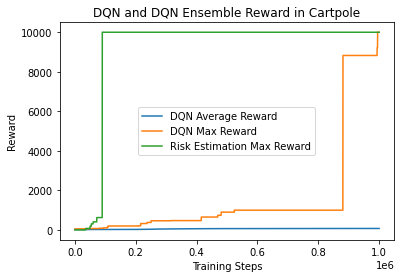

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

ens_results = np.zeros(1000000)
ens_results[36000:] = 73.7
ens_results[50000:] = 189.2
ens_results[54000:] = 305.9
ens_results[60000:] = 407.9
ens_results[72000:] = 624.8
ens_results[90000:] = 10000

avg_dqn = np.load('avg_rew.npy')
max_dqn = np.load('max_rewards.npy')
steps_per_ep = int(1000000 / len(avg_dqn))
avg_dqn_arr = np.zeros(1000000)
max_dqn_arr = np.zeros(1000000)
for i in range(len(avg_dqn)):
    avg_dqn_arr[i*steps_per_ep:] = avg_dqn[i]
    max_dqn_arr[i*steps_per_ep:] = max_dqn[i]

plt.plot(avg_dqn_arr, label='DQN Average Reward')
plt.plot(max_dqn_arr, label='DQN Max Reward')
plt.plot(ens_results, label='Risk Estimation Max Reward')
plt.xlabel('Training Steps')
plt.ylabel('Reward')
plt.legend()
plt.title("DQN and DQN Ensemble Reward in Cartpole")
#plt.show()
plt.savefig('./DQN_and_Ensemble_risk_rew.png')



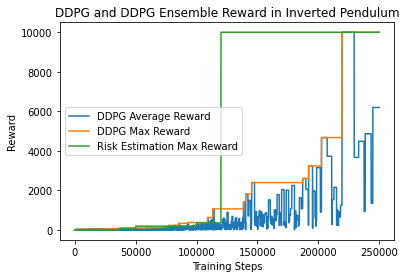

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

ens_results = np.zeros(1000000)
ens_results[36000:] = 73.7
ens_results[50000:] = 189.2
ens_results[100000:] = 352.7
ens_results[120000:] = 10000


avg_dqn = np.load('Pendulum_all_reward.npy')
avg_dqn_arr = np.zeros(1000000)
max_dqn_arr = np.zeros(1000000)
cur_step = 0
prev_step = 0
for i in range(len(avg_dqn)):
    cur_step += int(avg_dqn[i]) 
    avg_dqn_arr[prev_step:cur_step] = avg_dqn[i]
    max_dqn_arr[prev_step:cur_step] = max(avg_dqn[:i+1])
    prev_step = cur_step

plt.plot(avg_dqn_arr[:250000], label='DDPG Average Reward')
plt.plot(max_dqn_arr[:250000], label='DDPG Max Reward')
plt.plot(ens_results[:250000], label='Risk Estimation Max Reward')
plt.xlabel('Training Steps')
plt.ylabel('Reward')
plt.legend()
plt.title("DDPG and DDPG Ensemble Reward in Inverted Pendulum")
#plt.show()
plt.savefig('./DDPG_pend_and_Ensemble_maj_risk_rew.png')



In [ ]:
!python Tests/sort_all_and_test.py --env 'Cartpole' #No Anneal, return voting. Doesn't work

Testing 210 ensembles
#40: Ensemble: (100000, 250000, 400000, 500000), Reward: 95.3, Variance: 0.29847243428230286
[0.4910808  0.18363064 0.         0.32528856]
[1.87582213 1.83888016 1.29831484 1.79618174]
[95.95, 90.05, 64.15, 91.9]
#39: Ensemble: (100000, 150000, 400000, 500000), Reward: 94.2, Variance: 0.29900312423706055
[0.65605096 0.         0.         0.34394904]
[1.85892173 1.59392934 1.29753363 1.78813573]
[95.95, 90.3, 64.15, 91.9]
#38: Ensemble: (100000, 250000, 400000, 450000), Reward: 94.3, Variance: 0.2992844879627228
[0.56521739 0.28419936 0.         0.15058324]
[1.88173015 1.84017279 1.30390076 1.75574278]
[95.95, 90.05, 64.15, 92.3]
#37: Ensemble: (100000, 150000, 400000, 450000), Reward: 96.0, Variance: 0.2998083233833313
[0.85625 0.      0.      0.14375]
[1.85934254 1.59655624 1.29039273 1.72812703]
[95.95, 90.3, 64.15, 92.3]
#36: Ensemble: (100000, 150000, 250000, 400000), Reward: 93.5, Variance: 0.30135443806648254
[0.62032086 0.01818182 0.36149733 0.        ]
[1.

In [ ]:
!python Tests/sort_all_and_test.py --env 'Cartpole' #No Anneal, return voting. Doesn't work

Testing 210 ensembles
#40: Ensemble: (50000, 200000, 250000, 400000), Reward: 518.4, Variance: 0.29269537329673767
[0.02816358 0.         0.48939043 0.48244599]
#39: Ensemble: (150000, 300000, 350000, 400000), Reward: 191.8, Variance: 0.2929774224758148
[0.34202294 0.11783107 0.         0.54014599]
#38: Ensemble: (200000, 250000, 300000, 400000), Reward: 1033.1, Variance: 0.2935481071472168
[0.         0.31042493 0.17326493 0.51631013]
#37: Ensemble: (50000, 150000, 200000, 400000), Reward: 225.1, Variance: 0.29426008462905884
[0.03331853 0.50466459 0.         0.46201688]
#36: Ensemble: (150000, 200000, 300000, 400000), Reward: 314.3, Variance: 0.2945677638053894
[0.42538976 0.         0.0906777  0.48393255]
#35: Ensemble: (100000, 400000, 450000, 500000), Reward: 260.1, Variance: 0.3062184453010559
[0.         0.51249519 0.48750481 0.        ]
#34: Ensemble: (100000, 250000, 400000, 450000), Reward: 484.7, Variance: 0.30787137150764465
[0.         0.06230658 0.51475139 0.42294203]
#33